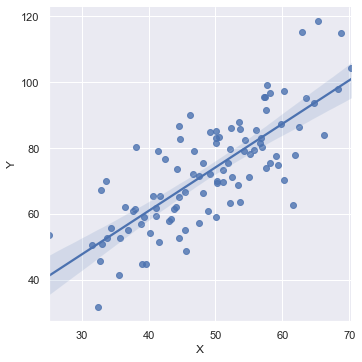

In [159]:
import numpy as np
import pandas as pd
from numpy import *
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('LR_using-GD_data.csv',header=0,usecols=["X","Y"])
X = df[["X"]]
Y = df[["Y"]]

sns.set()
sns.lmplot(x="X",y="Y",data=df)
plt.show()

**Hypothesis : Y = b0 + b1*X**

In [160]:
#Hyperparameters
learning_rate = 0.0001
num_iterations = 1000

#initially
b0,b1 = [1,1]

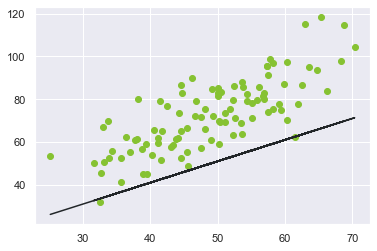

In [161]:
def plot_line_on_graph(b0,b1,data):
    x_plots = []
    y_plots = []
    for i in range(0,len(data)):
        x = data.iloc[i]['X']
        y_predict = b0 + b1*x
        x_plots.append(x)
        y_plots.append(y_predict)
    #scatter the original data points
    plt.scatter(X,Y,c='#86C232')
    #plot line for predicted y values 
    plt.plot(x_plots,y_plots,c='#222629')
    plt.show()

# graph initially when b0 and b1 are 1s
plot_line_on_graph(b0,b1,df)

**Cost Function**
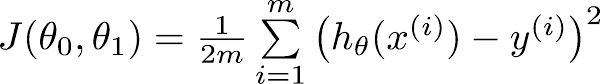

In [162]:
def cost_function(b0,b1,data):
    total_error = 0
    for i in range(len(data)):
        x = data.iloc[i]['X']
        y = data.iloc[i]['Y']
        total_error = ((b0 + b1*x) - y)**2
    return total_error/float(len(data))

# Initial cost function when b0 and b1 are 1s
cost_function(b0,b1,df)

7.4670533366813565

**Gradient Descent**
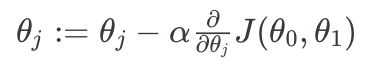

Theta (0,1) = coefficients b0,b1

**Updating coefficients**


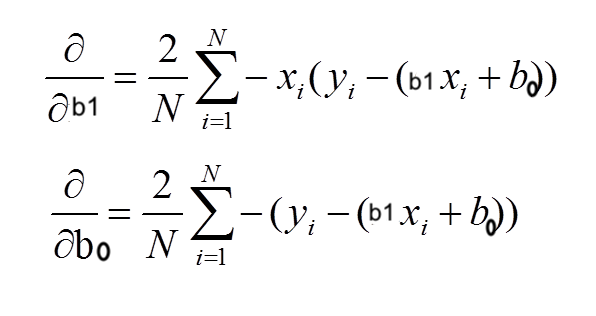

In [163]:
# calculates the partial derivative of coefficients and returns updated coefficient values given a learning rate
def gradient_descent(b0_current, b1_current, data, learning_rate):
    b0_gradient = 0
    b1_gradient = 0
    N = float(len(data))
    for i in range(len(data)):
        x = data.iloc[i]['X']
        y = data.iloc[i]['Y']
        b0_gradient += -(2/N) * (y - ((b1_current*x) + b0_current))
        b1_gradient += -(2/N) * (x*(y - ((b1_current*x) + b0_current)))
    new_b0 = b0_current - (learning_rate*b0_gradient)
    new_b1 = b1_current - (learning_rate*b1_gradient)
    return [new_b0,new_b1]
    

In [164]:
# runs the gradient descent algorithm on the data set until optimal theta(coefficient) values are found
def gradient_descent_iterations(data, b0, b1, learning_rate, num_iterations):
    iteration_count = 0
    for i in range(num_iterations):
        iteration_count += 1
        b0_old = b0
        b1_old = b1
        
        #update coefficient values
        b0,b1 = gradient_descent(b0,b1,data,learning_rate)
        plt.scatter(iteration_count, abs(b0 - b0_old) + abs(b1 - b1_old), c='r')
        
        # check to see if we have converged (rate of change is less than learning rate)
        if abs(b0-b0_old)<learning_rate and abs(b1-b1_old)<learning_rate:
            break
    print("converged, completed after {0} iterations".format(iteration_count))
    plt.show()
    return [b0,b1]
        

converged, completed after 13 iterations


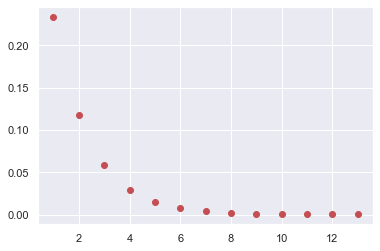

[1.0097183701447159, 1.459587862280972]

In [165]:
# run gradient descent to find and return optimal coefficient values
[b0,b1] = gradient_descent_iterations(df,b0,b1,learning_rate,num_iterations)
[b0,b1]

In [166]:
end_cost_function = cost_function(b0,b1,df)
end_cost_function

2.4861231095806158

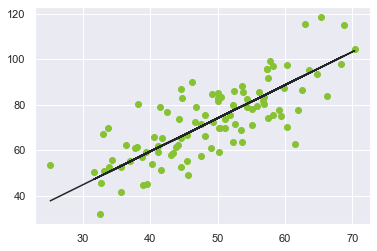

In [167]:
# graph after finding optimal values of coefficients using gradient descent
plot_line_on_graph(b0,b1,df)